<div style="color:white;background-color:Gray;padding:2%;border-radius:130px 130px;font-size:2em;text-align:center">Solar Power Generation Prediction & Fault/Abnormalities Analysis</div>

<div style="color:#333;
       display:block;
       border-radius:8px;
       background-color:#add8e6;
       font-size:18px;
       font-family:'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
       letter-spacing:0.5px;
       box-shadow: 0 4px 8px rgba(0,0,0,0.2), 0 6px 20px rgba(0,0,0,0.19);
       margin-top: 10px;
       padding: 10px;">
    <p style="padding: 20px;
          color:Black;">
        Plant_2_Generation_Data.csv: This dataset includes the fields DATE_TIME, PLANT_ID, DC_Power, AC_POWER, DAILY_YIELD, and TOTAL_YIELD.
    </p>
</div>


<div style="color:#333;
       display:block;
       border-radius:8px;
       background-color:#add8e6;
       font-size:18px;
       font-family:'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
       letter-spacing:0.5px;
       box-shadow: 0 4px 8px rgba(0,0,0,0.2), 0 6px 20px rgba(0,0,0,0.19);
       margin-top: 20px;
       padding: 20px;">
    <p>
        <strong>Plant_2_Weather_Sensor_Data.csv</strong>: This dataset captures a range of meteorological parameters alongside operational data, including <strong>DATE_TIME</strong> (timestamp of the data entry), <strong>PLANT_ID</strong> (the identifier for the solar power installation), <strong>SOURCE_KEY</strong> (sensor identifier), <strong>AMBIENT_TEMPERATURE</strong> (the temperature of the surrounding environment), <strong>MODULE_TEMPERATURE</strong> (the temperature of the solar modules), and <strong>IRRADIATION</strong> (solar energy received per unit area).
    </p>
</div>


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">1. Importing Libraries
</span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.precision', 3)

pd.set_option('display.max_columns', None)  # No limit on the number of displayed columns
pd.set_option('display.max_rows', None)     # No limit on the number of displayed rows

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">2. Importing Power Generation & Weather Sensor Data
</span>

In [3]:
generation_data = pd.read_csv(r'\Users\dell\Downloads\New folder (2)\Plant_1_Generation_Data.csv')

In [4]:
weather_data = pd.read_csv(r'\Users\dell\Downloads\New folder (2)\Plant_2_Weather_Sensor_Data.csv')

In [6]:
generation_data.sample(5).style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Altimeter
32390,31-05-2020 15:30,4135001.000000,zBIq5rxdHJRwDNY,3231.285714,317.500000,5429.000000,6462730.000000,30.210000
30334,30-05-2020 16:15,4135001.000000,adLQvlD726eNBSB,5647.250000,553.450000,6912.500000,6394264.500000,30.160000
71494,nan,nan,nan,nan,nan,nan,nan,nan
35043,01-06-2020 21:45,4135001.000000,uHbuxQJl8lW7ozc,0.000000,0.000000,5589.000000,7170942.000000,29.940000
52676,10-06-2020 08:30,4135001.000000,3PZuoBAID5Wc2HD,3624.571429,356.271429,622.857143,7184541.857000,29.560000


In [8]:
weather_data.sample(5).style.set_properties(
    **{
        'background-color': 'pink',
        'color': 'Black',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
1742,2020-06-02 04:30:00,4136001,iq8k7ZNt4Mwm3w0,23.159516,22.215367,0.000000
2858,2020-06-13 19:45:00,4136001,iq8k7ZNt4Mwm3w0,25.689108,24.811206,0.000000
178,2020-05-16 20:45:00,4136001,iq8k7ZNt4Mwm3w0,28.360543,26.710663,0.000000
1402,2020-05-29 15:00:00,4136001,iq8k7ZNt4Mwm3w0,35.635428,46.974825,0.513567
3086,2020-06-16 04:45:00,4136001,iq8k7ZNt4Mwm3w0,24.005709,22.993255,0.000000


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">3. Adjust datetime format
</span>

In [9]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'], format='%d-%m-%Y %H:%M')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">4. Merging generation data and weather sensor data  
</span>

In [13]:
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5).style.background_gradient()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Altimeter,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
4834,2020-05-17 10:45:00,1BY6WEcLGh8j5v7,11416.428570,1114.814286,2397.714286,6274002.714000,29.950000,32.983187,50.800838,0.748738
37532,2020-06-03 03:15:00,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6390468.000000,30.470000,23.739755,22.957135,0.000000
23123,2020-05-26 21:15:00,rGa61gmuvPhdLxV,0.000000,0.000000,0.000000,7199869.000000,29.870000,30.262353,28.856251,0.000000
33099,2020-06-01 00:15:00,ZoEaEvLYb1n2sOq,0.000000,0.000000,0.000000,7222644.000000,29.530000,25.005375,23.899510,0.000000
46352,2020-06-07 09:15:00,wCURE6d3bPkepu2,8249.000000,807.300000,975.714286,6954069.714000,30.110000,28.494635,43.010739,0.710892


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">5. Adding separate time and date columns  
</span>

In [14]:
# Adding separate date and time columns
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month
df_solar['WEEK'] = pd.to_datetime(df_solar['DATE_TIME']).dt.isocalendar().week

# Since the "TIME" field has already been extracted, no need for additional parsing for HOURS and MINUTES
# This step is optimized based on previous feedback
df_solar['HOURS'] = pd.to_datetime(df_solar['DATE_TIME']).dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['DATE_TIME']).dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS'] * 60

# Add date as string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str)
df_solar["HOURS"] = df_solar["HOURS"].astype(str)

# You might not want to convert "TIME" to string if you've already used it for numerical calculations above
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head(2)


,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Altimeter,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6.260e+06,30.02,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6.184e+06,29.70,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15


In [15]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68708 entries, 0 to 68707
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            68708 non-null  datetime64[ns]
 1   SOURCE_KEY           68708 non-null  object        
 2   DC_POWER             68708 non-null  float64       
 3   AC_POWER             68708 non-null  float64       
 4   DAILY_YIELD          68708 non-null  float64       
 5   TOTAL_YIELD          68708 non-null  float64       
 6   Altimeter            68708 non-null  float64       
 7   AMBIENT_TEMPERATURE  68708 non-null  float64       
 8   MODULE_TEMPERATURE   68708 non-null  float64       
 9   IRRADIATION          68708 non-null  float64       
 10  DATE                 68708 non-null  object        
 11  TIME                 68708 non-null  object        
 12  DAY                  68708 non-null  int32         
 13  MONTH                68708 non-

In [16]:
df_solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
Altimeter              0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
WEEK                   0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

<code style="background:yellow;color:red">There is no Missing Values in the dataset </code>

In [18]:
df_solar.describe().style.background_gradient()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Altimeter,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,WEEK,MINUTES,TOTAL MINUTES PASS
count,68708,68708.000000,68708.000000,68708.000000,68708.000000,68708.000000,68708.000000,68708.000000,68708.000000,68708.000000,68708.000000,68708.000000,68708.000000,68708.000000
mean,2020-06-01 08:09:31.269721344,3145.740142,307.637345,3292.746206,6978760.573789,30.022791,28.095600,32.976117,0.238832,15.762328,5.518717,22.550009,22.497817,716.247599
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,6183645.000000,29.480000,20.942385,20.265123,0.000000,1.000000,5.000000,20.000000,0.000000,0.000000
25%,2020-05-24 00:45:00,0.000000,0.000000,0.000000,6512031.361500,29.910000,24.602479,23.738608,0.000000,9.000000,5.000000,21.000000,15.000000,360.000000
50%,2020-06-01 14:30:00,422.267857,40.814286,2647.196428,7146685.000000,30.030000,27.063545,27.788045,0.030336,16.000000,6.000000,23.000000,30.000000,720.000000
75%,2020-06-09 20:15:00,6359.459822,622.977679,6272.169643,7268800.254500,30.130000,31.067282,40.821388,0.448928,23.000000,6.000000,24.000000,30.000000,1065.000000
max,2020-06-17 23:45:00,14471.125000,1410.950000,9163.000000,7846821.000000,30.670000,39.181638,66.635953,1.098766,31.000000,6.000000,25.000000,45.000000,1425.000000
std,nan,4037.184118,394.466485,3145.069221,416273.818336,0.185934,4.072488,11.406764,0.314324,8.551014,0.499653,1.461521,16.765945,412.174536


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">6. Converting 'SOURCE_KEY' from categorical form to numerical form
</span>

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Altimeter,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6.260e+06,30.02,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,0
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6.184e+06,29.70,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,1
2,2020-05-15,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6.988e+06,29.82,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,2
3,2020-05-15,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7.603e+06,30.26,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,3
4,2020-05-15,McdE0feGgRqW7Ca,0.0,0.0,0.0,7.159e+06,30.35,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,4


<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:35px; color:#e90045">Data Visualization: </h1>

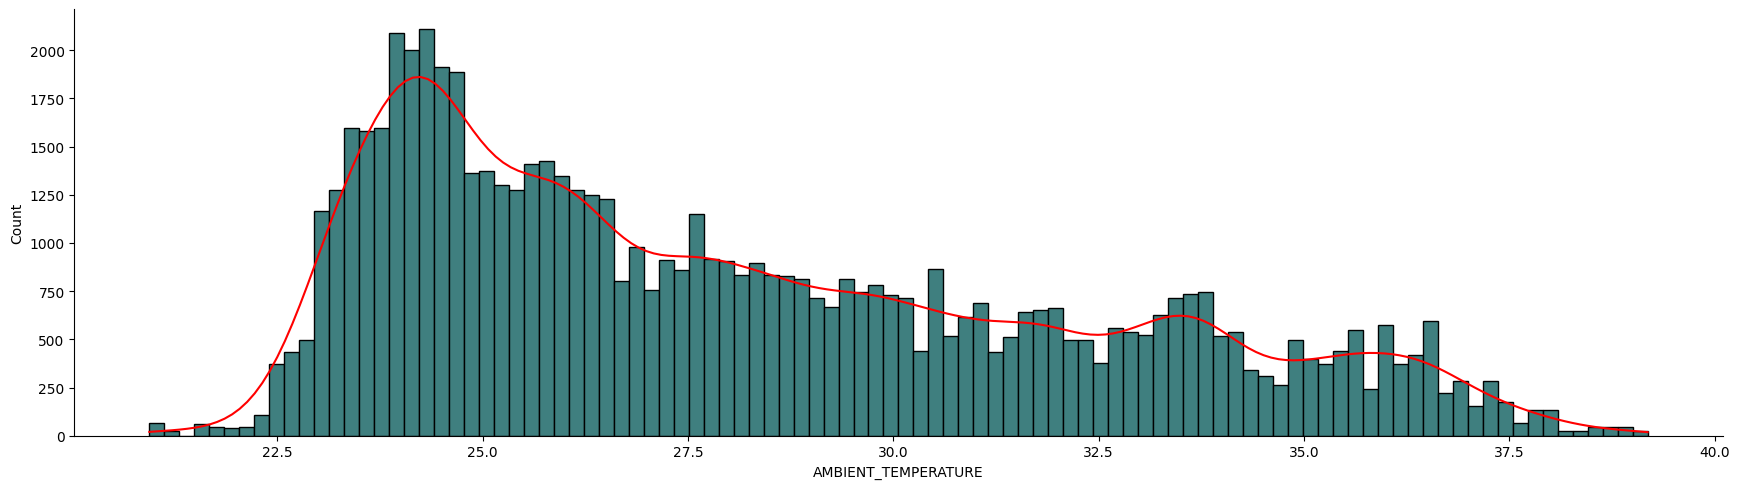

In [20]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

In [21]:
df_solar['DATE'].nunique()

34

<code style="background:yellow;color:red">The data of solar power generation is of 34 days </code>

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:25px; color:#e90045">Faults & Abnormalities detection in solar power plant generation </h1>

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">7. Multiple Plotting of DC_POWER generation on per day basis.
</span>

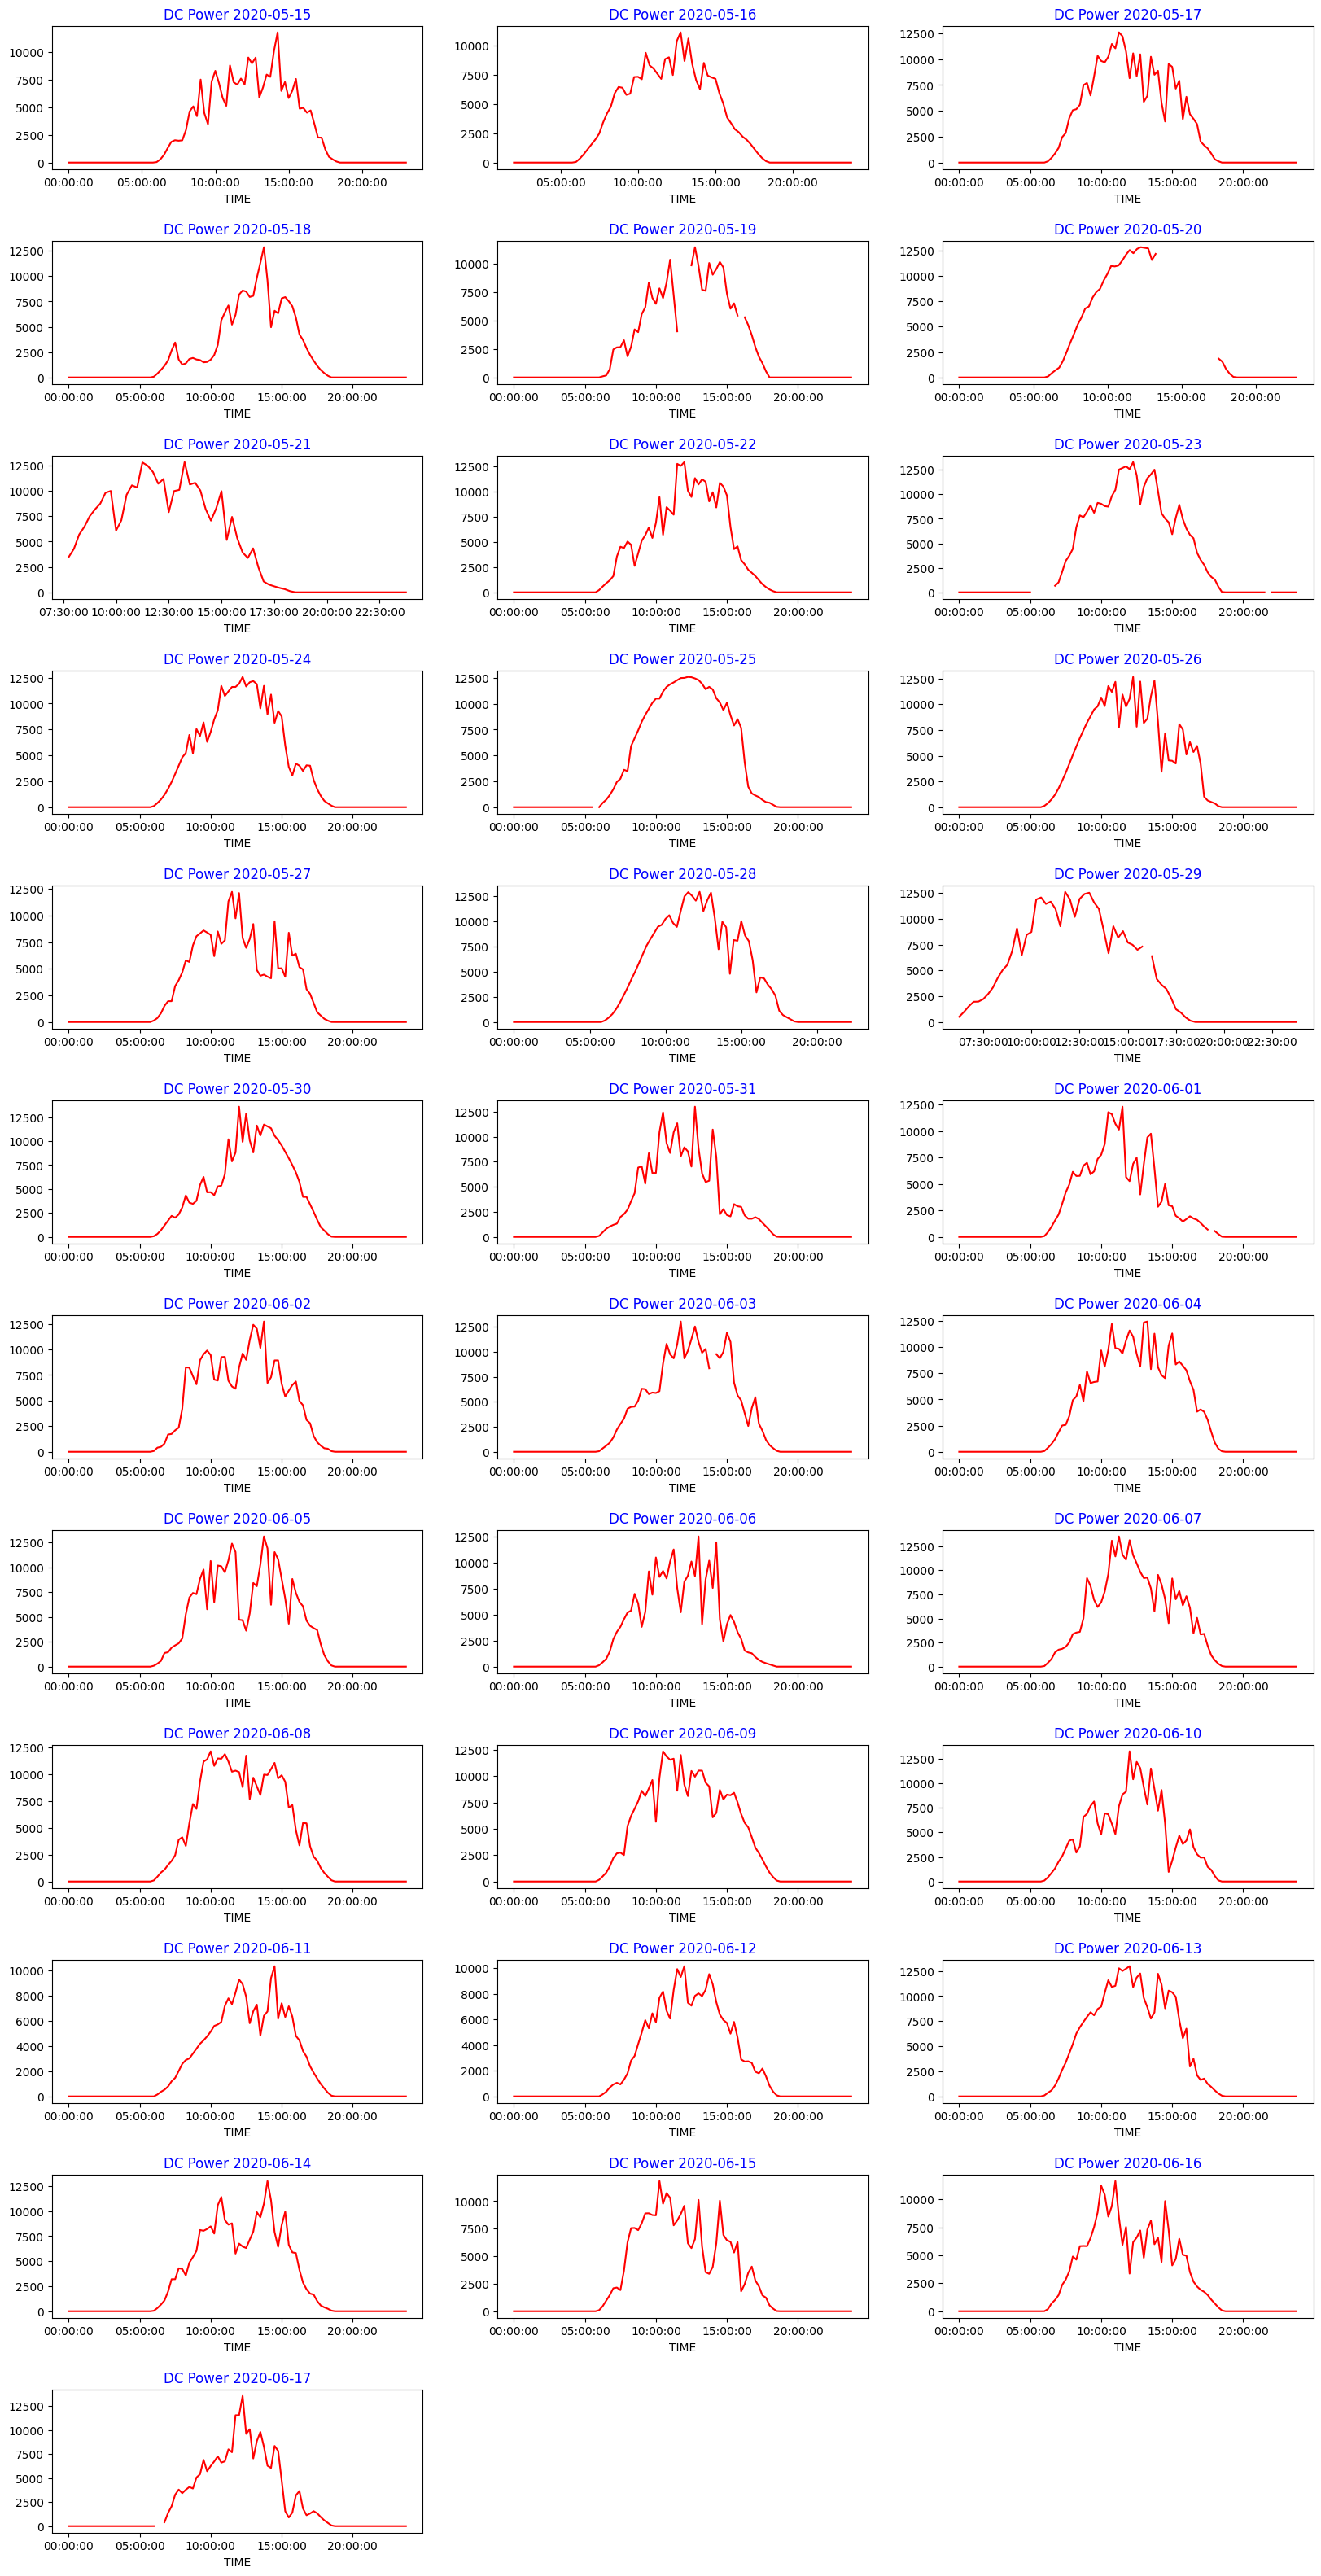

In [22]:
solar_dc = df_solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_dc, row=12, col=3)

<span class="label label-default" style="background-color:pink; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:Red; ">Ideal Graph of Solar Power Generation 📊📈</span>

<img src="https://www.solarmarket.com.au/wp-content/uploads/2021/04/solar-output-graph.png" alt="Solar Panel" width="50%">
</center>

<span style="background-color:maroon;
             color:white;
             font-size:16px;
             text-align:center;
             border-radius:30px 30px;
             font-weight:bold;
             border:2px solid red;
             padding:5px">Abnormalities in DC_POWER Generation
</span>

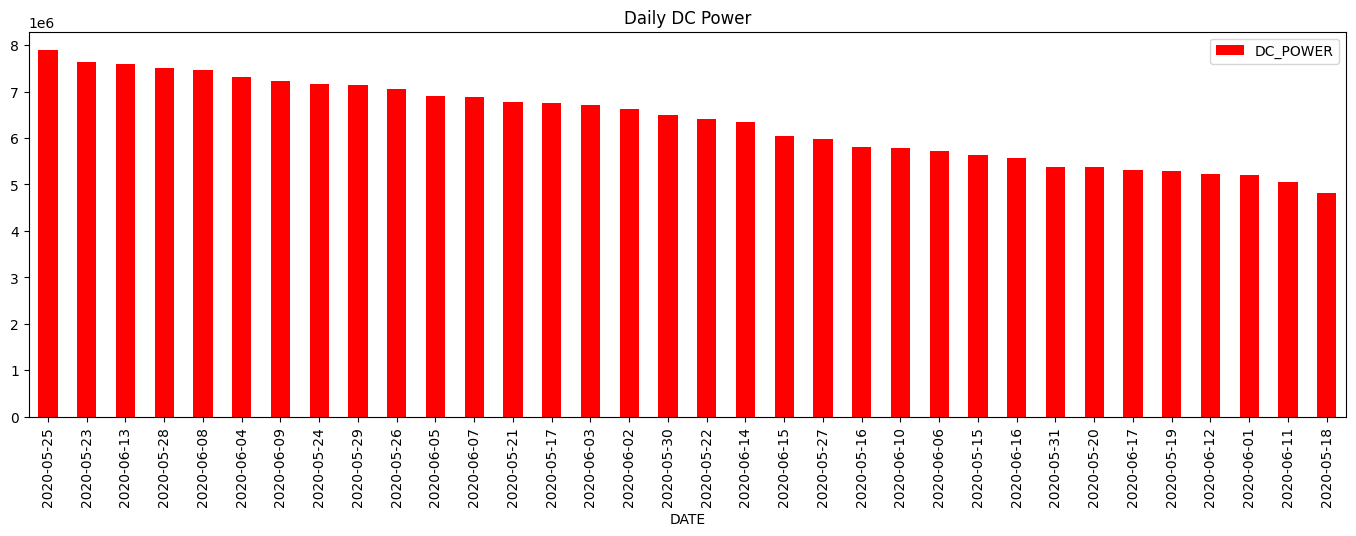

In [23]:
daily_dc = df_solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('Daily DC Power')
plt.show()

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">8. Multiple Plotting of IRRADIATION generation on per day basis.
</span>

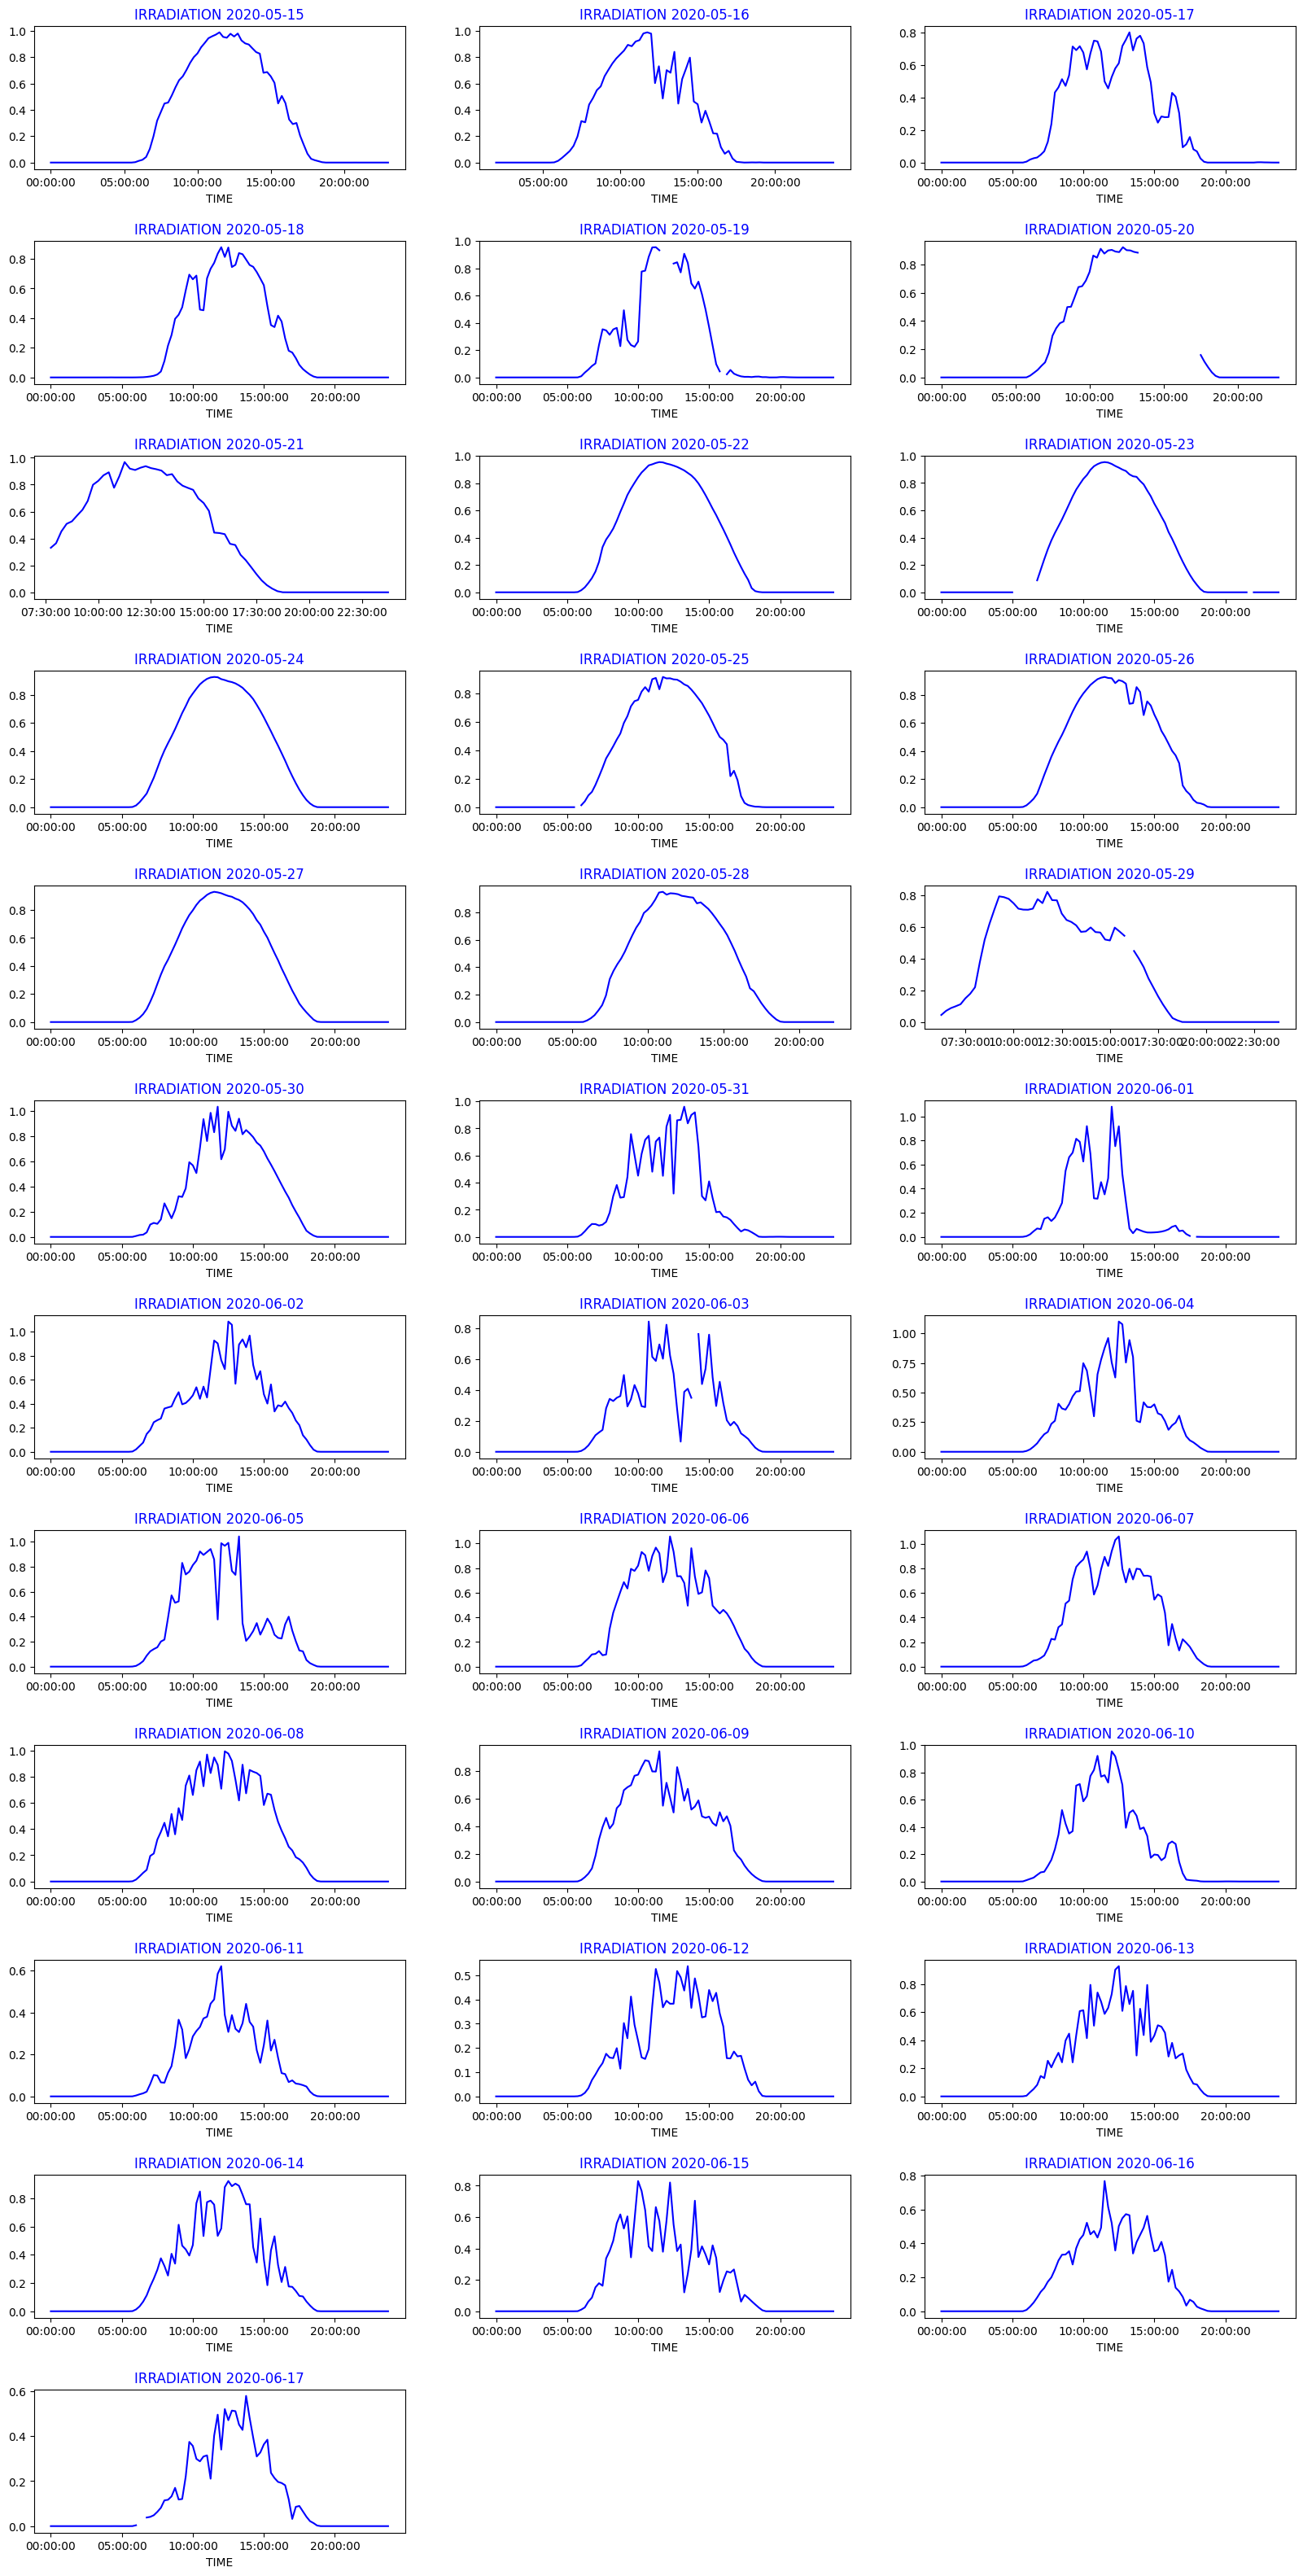

In [24]:
solar_irradiation = df_solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_irradiation, row=12, col=3)

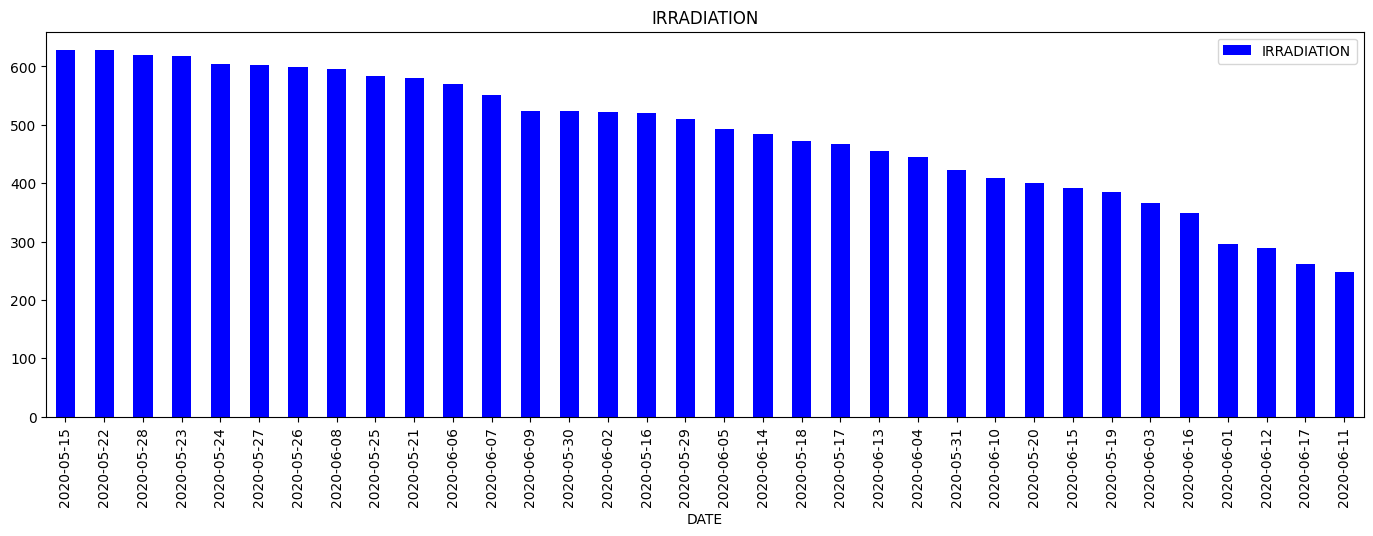

In [25]:
daily_irradiation = df_solar.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('IRRADIATION')
plt.show()

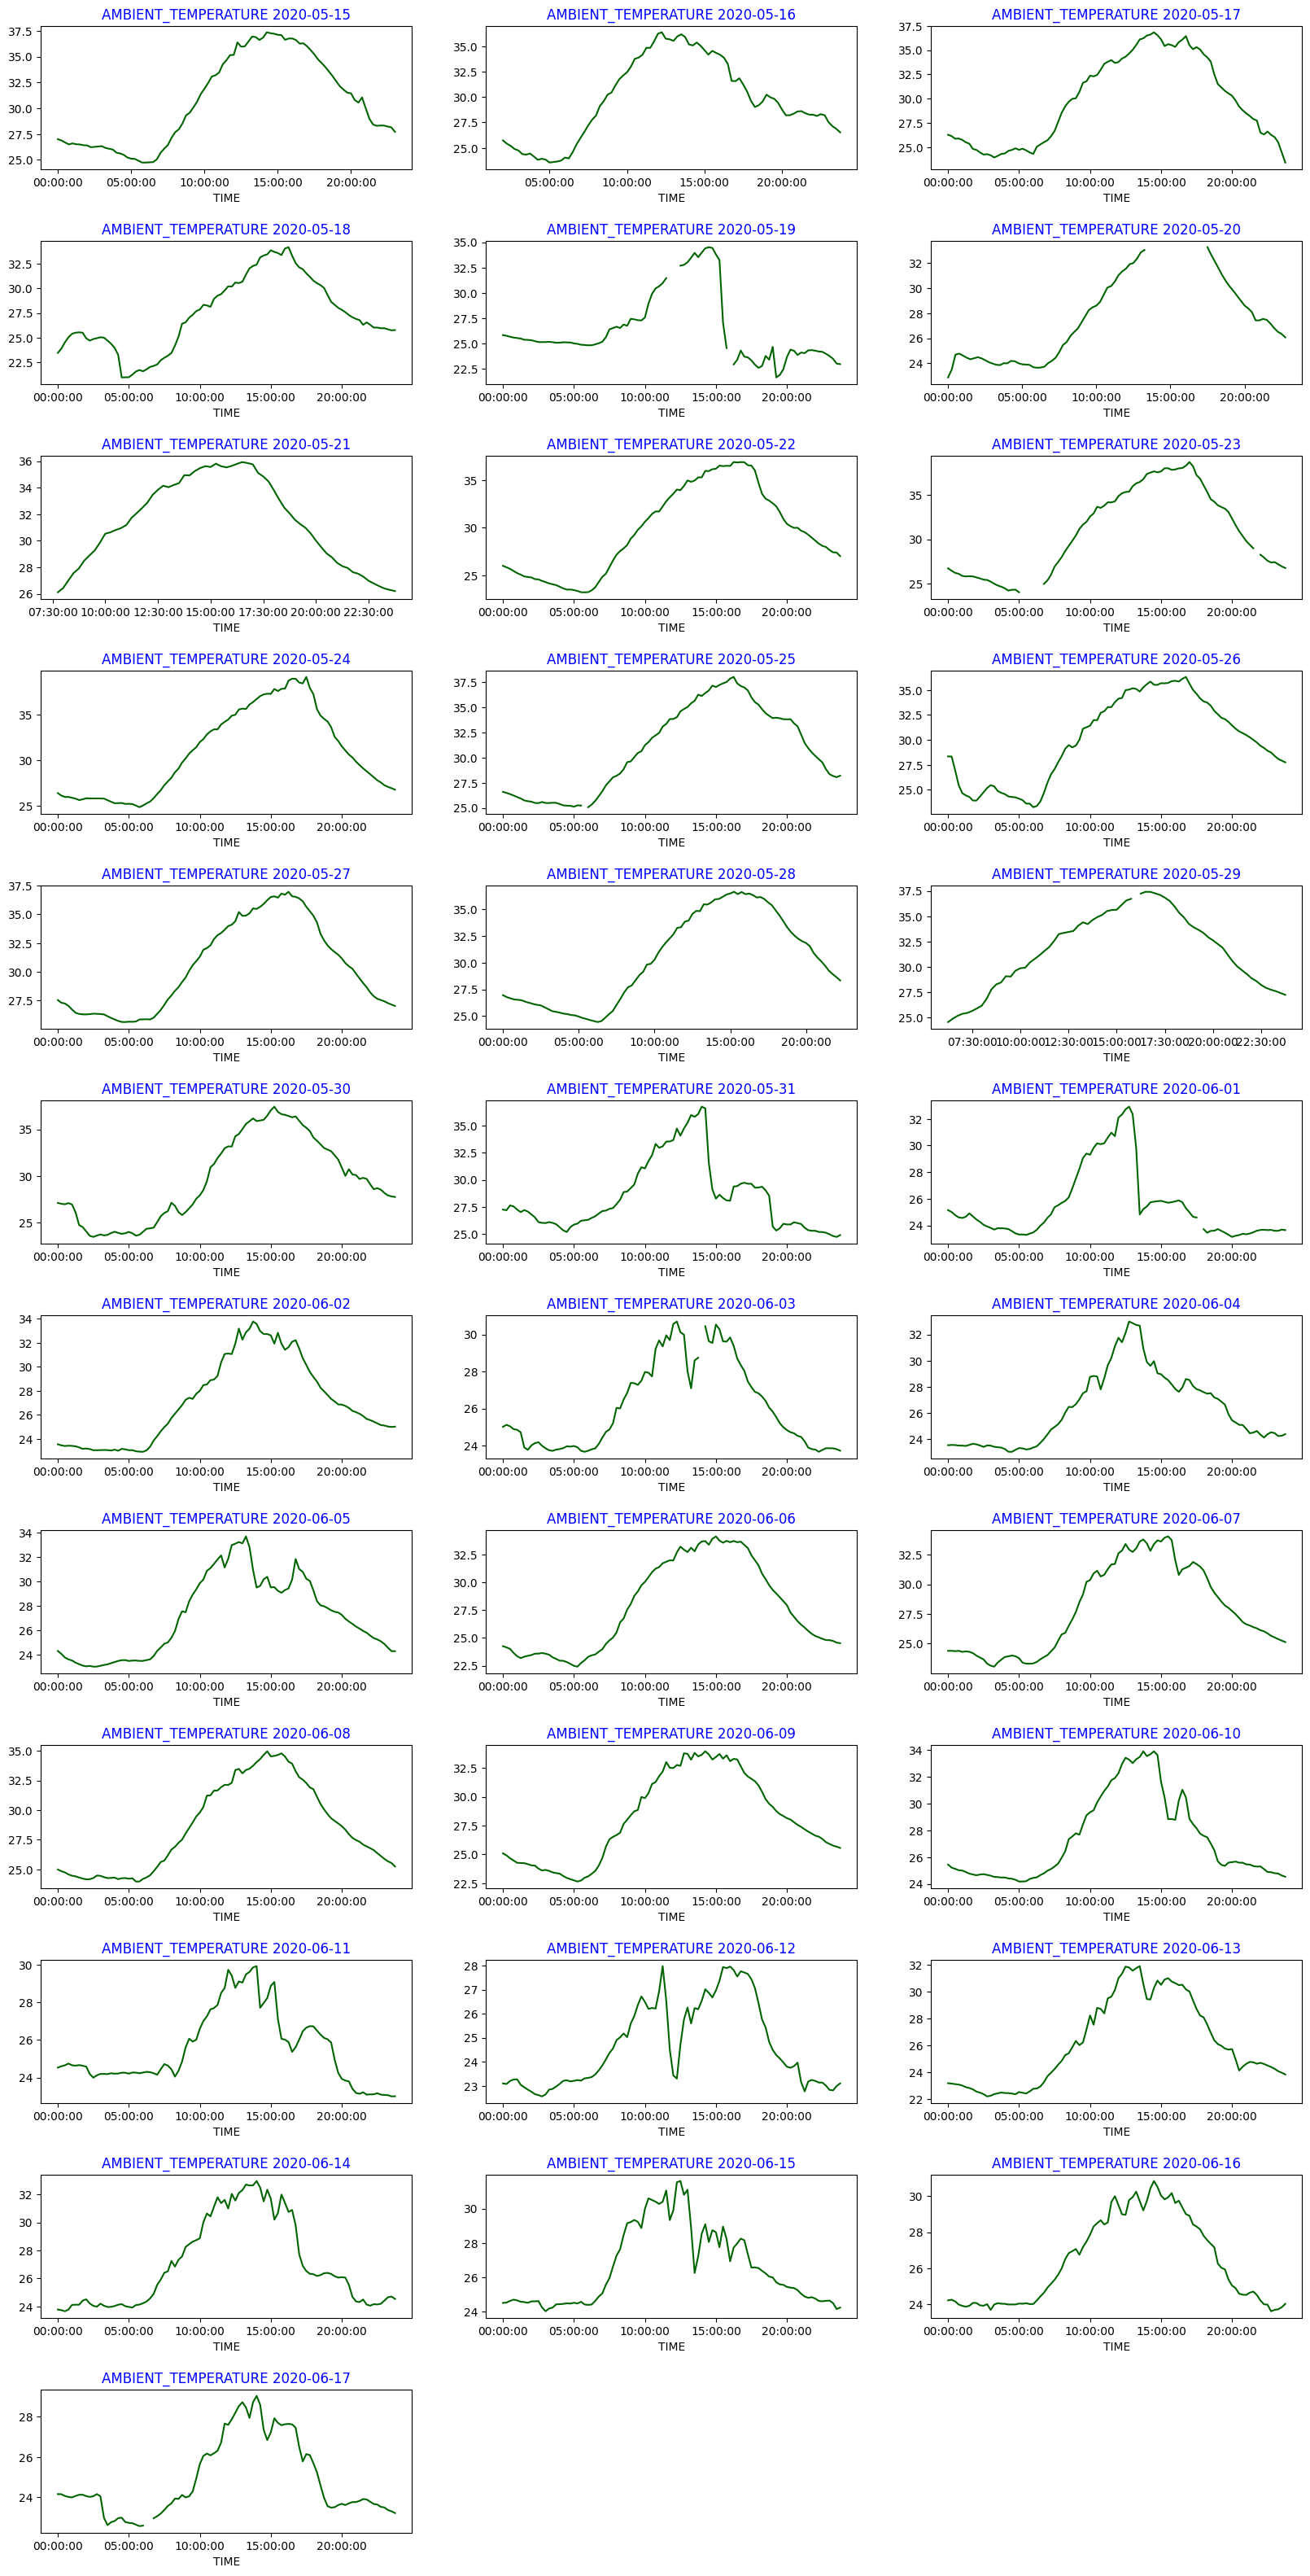

In [26]:
solar_ambiant_temp = df_solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_ambiant_temp, row=12, col=3)

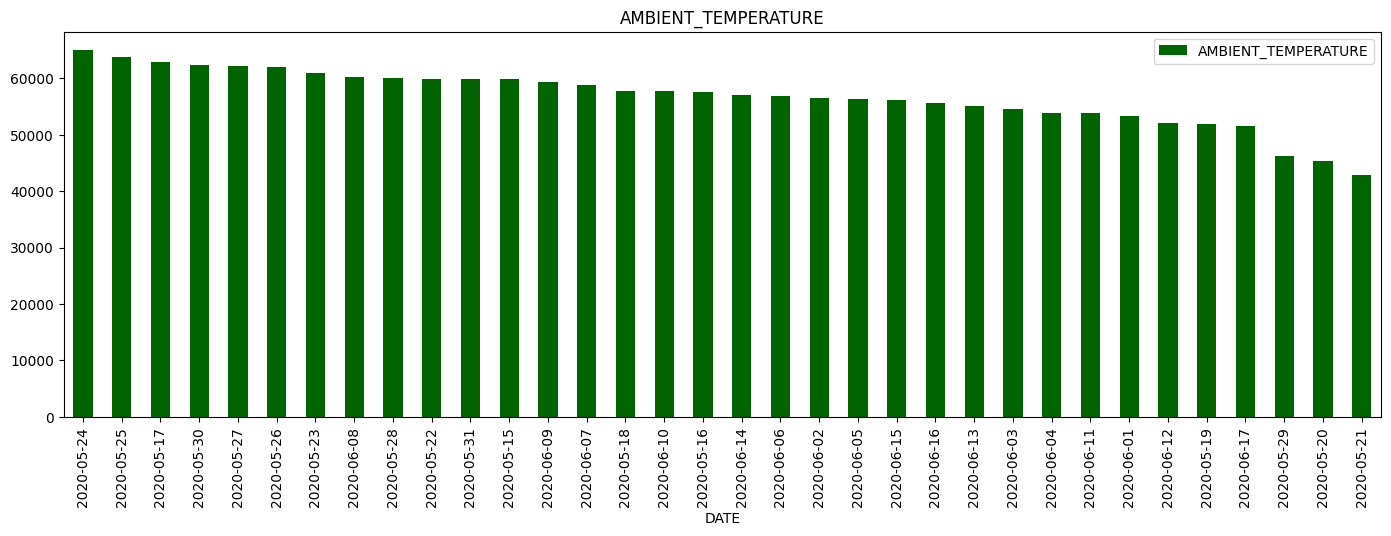

In [27]:
daily_ambient_temp = df_solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkgreen')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:35px; color:#e90045">Best and Worst Power generation comparision: </h1>

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">9. Highest average DC_POWER is generated on "2020-05-15"  
</span>

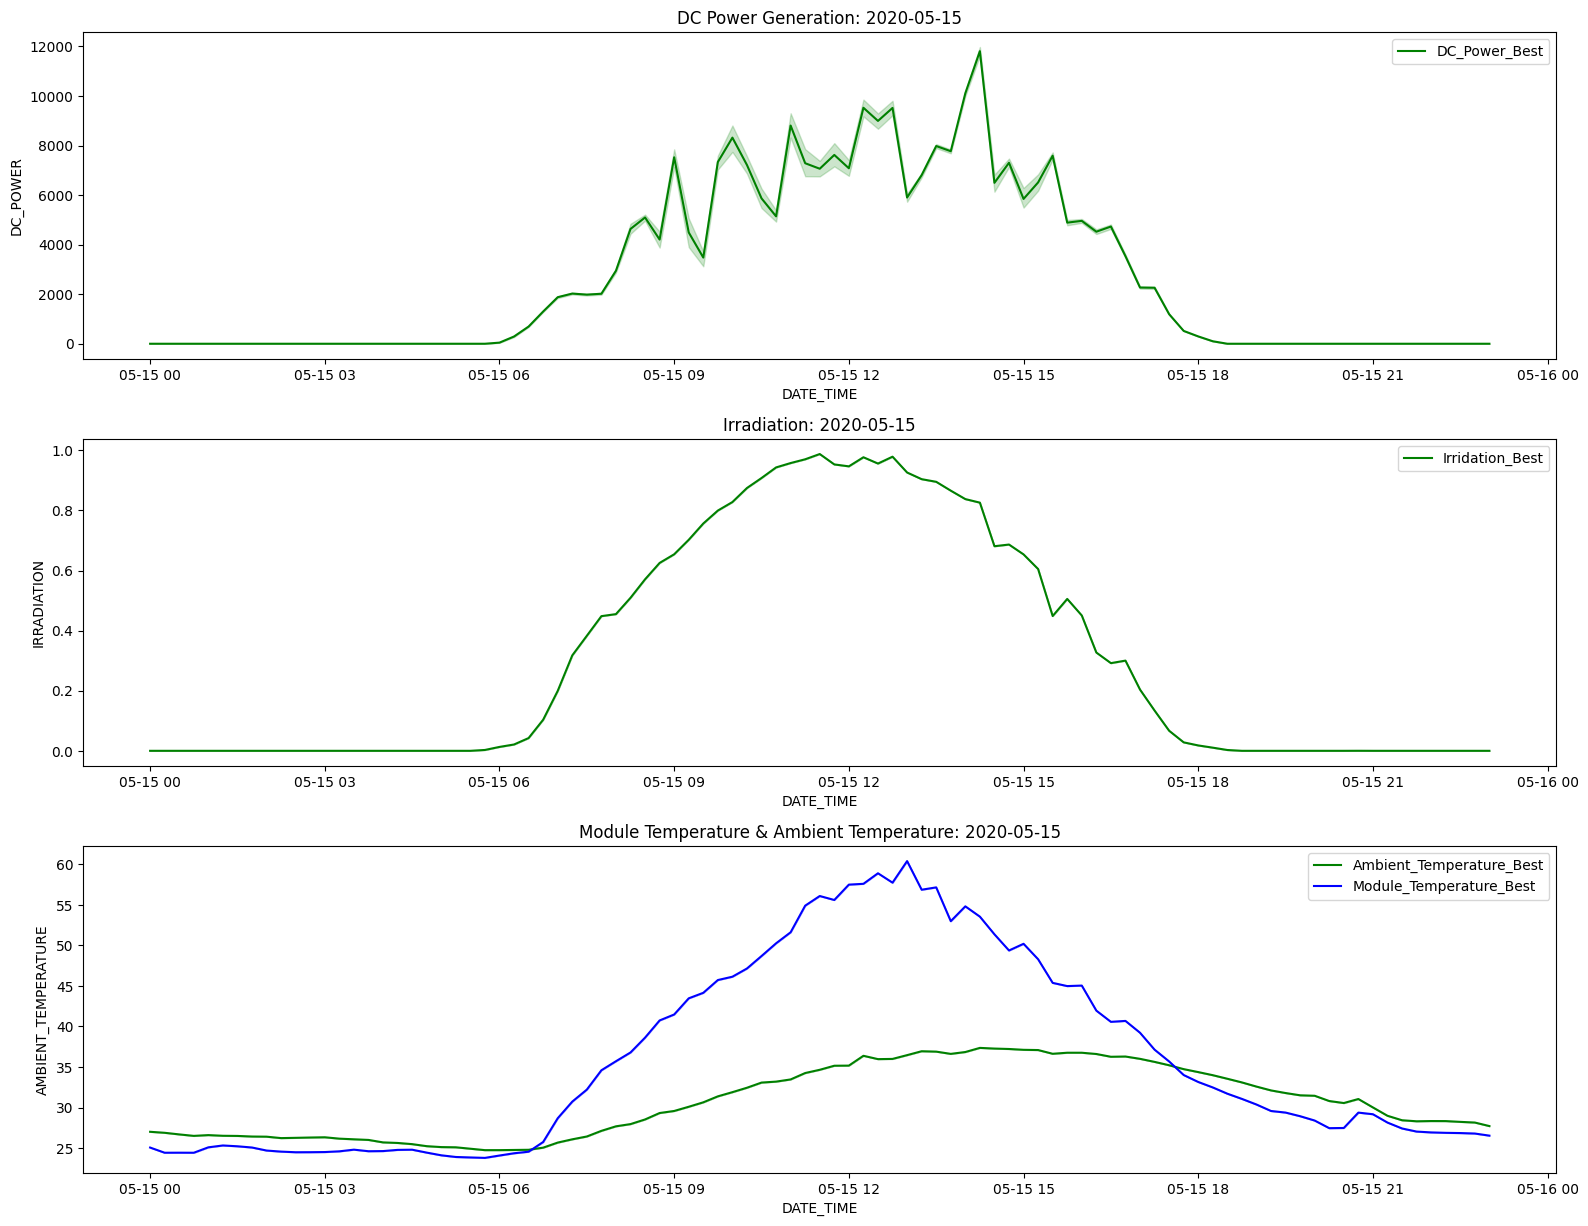

In [28]:
plt.figure(figsize=(16, 16))

date = ["2020-05-15"]

plt.subplot(411)
sns.lineplot(x='DATE_TIME', y='DC_POWER', data=df_solar[df_solar["DATE_STRING"].isin(date)], label="DC_Power_Best", color='green')
plt.title("DC Power Generation: {}".format(date[0]))

plt.subplot(412)
sns.lineplot(x='DATE_TIME', y='IRRADIATION', data=df_solar[df_solar["DATE_STRING"].isin(date)], label="Irridation_Best", color='green')
plt.title("Irradiation: {}".format(date[0]))

plt.subplot(413)
sns.lineplot(x='DATE_TIME', y='AMBIENT_TEMPERATURE', data=df_solar[df_solar["DATE_STRING"].isin(date)], label="Ambient_Temperature_Best", color='green')
sns.lineplot(x='DATE_TIME', y='MODULE_TEMPERATURE', data=df_solar[df_solar["DATE_STRING"].isin(date)], label="Module_Temperature_Best", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

plt.tight_layout()
plt.show()

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">10. Lowest average DC_POWER is generated on "2020-06-11"  
</span>

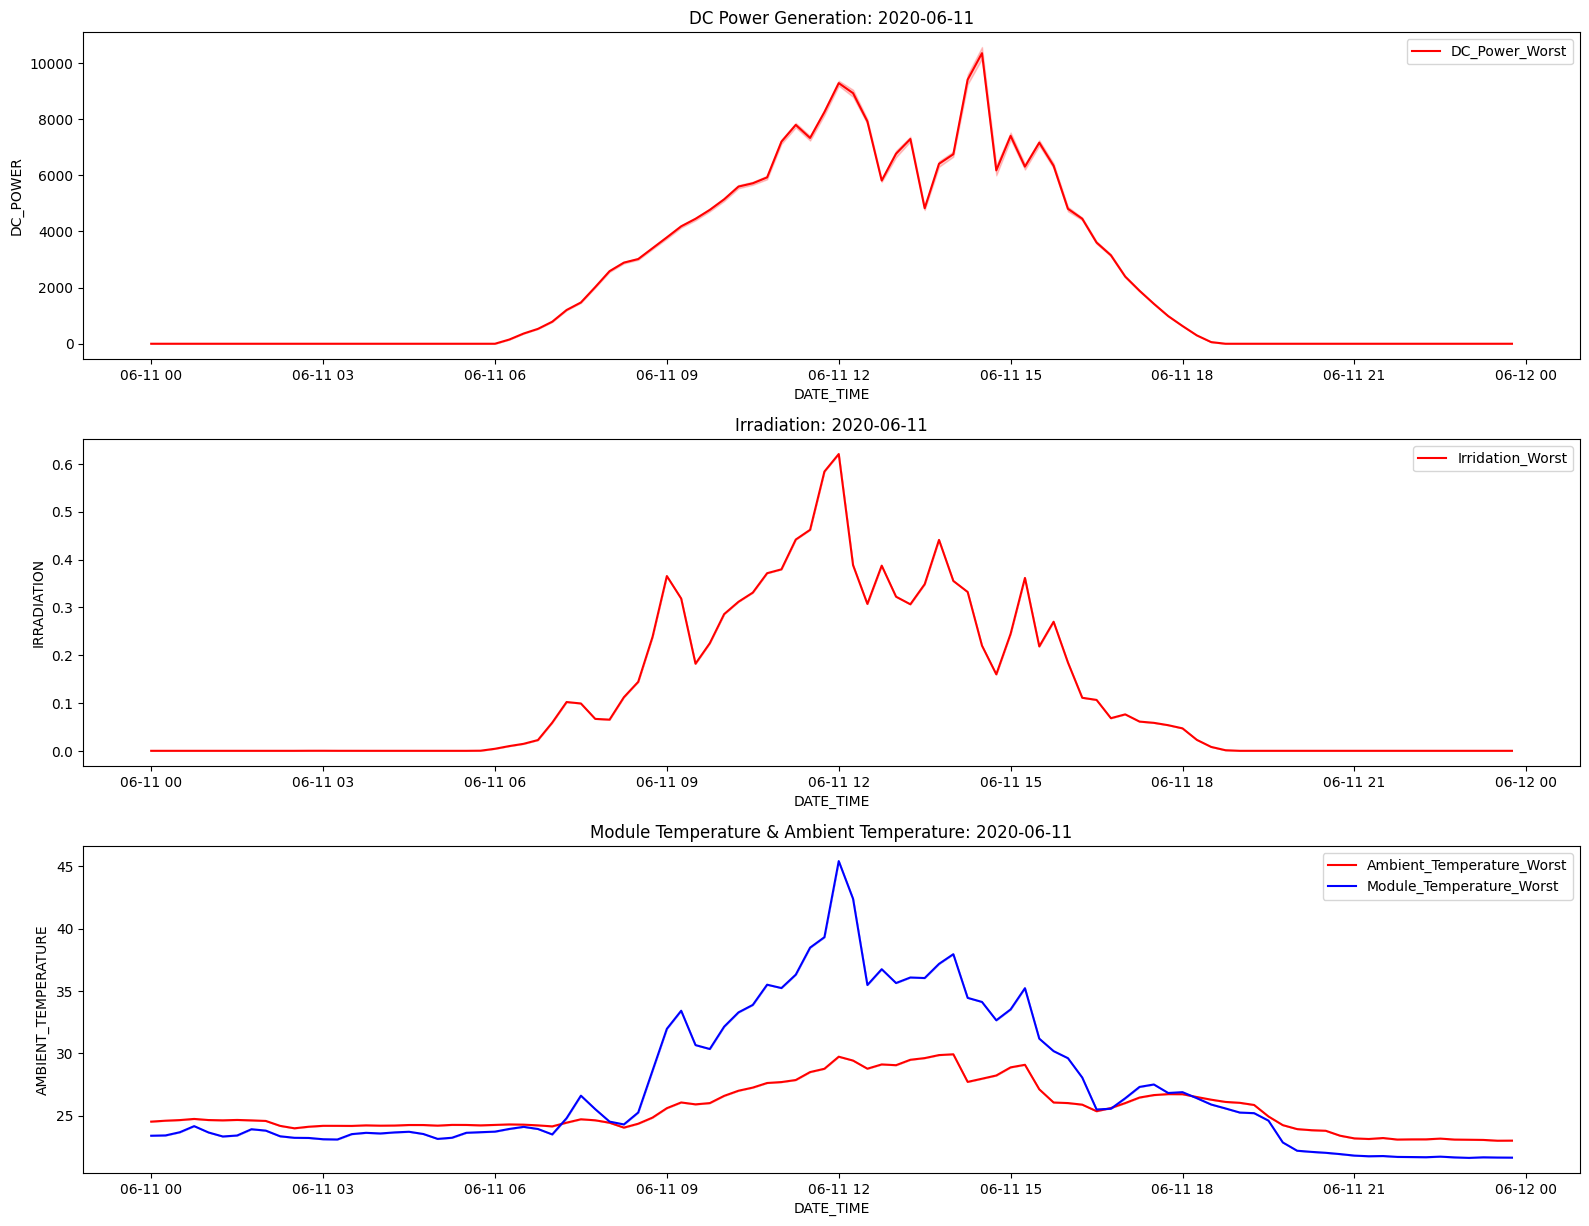

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

date = ["2020-06-11"]
plt.figure(figsize=(16, 16))

# Subplot 1: DC Power
plt.subplot(411)
sns.lineplot(x='DATE_TIME', y='DC_POWER', data=df_solar[df_solar["DATE_STRING"].isin(date)], label="DC_Power_Worst", color='red')
plt.title("DC Power Generation: {}".format(date[0]))

# Subplot 2: Irradiation
plt.subplot(412)
sns.lineplot(x='DATE_TIME', y='IRRADIATION', data=df_solar[df_solar["DATE_STRING"].isin(date)], label="Irridation_Worst", color='red')
plt.title("Irradiation: {}".format(date[0]))

# Subplot 3: Module and Ambient Temperature
plt.subplot(413)
sns.lineplot(x='DATE_TIME', y='AMBIENT_TEMPERATURE', data=df_solar[df_solar["DATE_STRING"].isin(date)], label="Ambient_Temperature_Worst", color='red')
sns.lineplot(x='DATE_TIME', y='MODULE_TEMPERATURE', data=df_solar[df_solar["DATE_STRING"].isin(date)], label="Module_Temperature_Worst", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

plt.tight_layout()
plt.show()


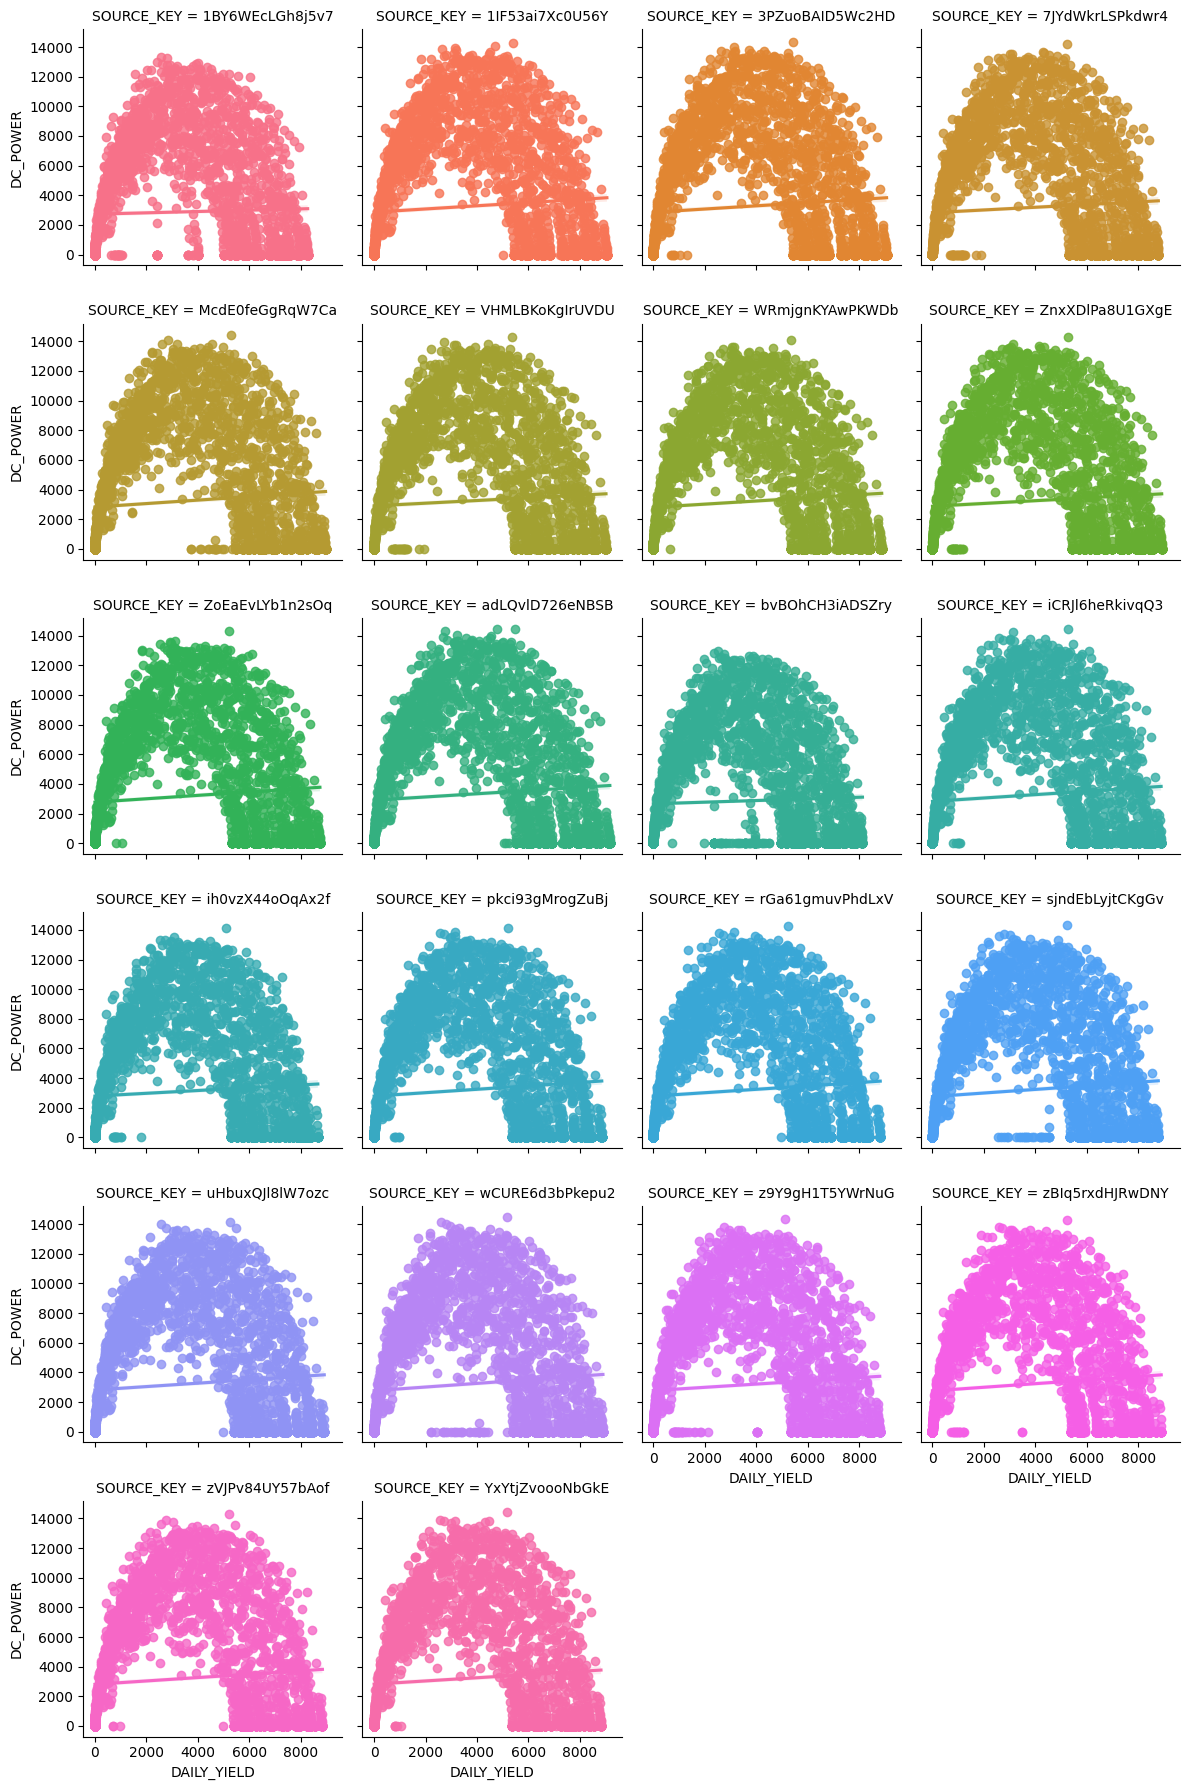

In [30]:
sns.lmplot(y="DC_POWER",x="DAILY_YIELD",hue="SOURCE_KEY",col="SOURCE_KEY",height=3,col_wrap=4,data=df_solar,fit_reg=True);

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:#e90045">Solar Power Plant Inverter Efficiency Calculation </h1>

In [31]:
solar_dc_power = df_solar[df_solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = df_solar[df_solar['AC_POWER'] > 0]['AC_POWER'].values

In [32]:
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power ratio AC/DC (Efficiency) of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power ratio AC/DC (Efficiency) of Solar Power Plant:  9.750 %


In [33]:
AC_list=[]
for i in df_solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
#AC_list.sort()
#AC_list.reverse()
len(AC_list)

36757

In [34]:
#Here we take all nonzero DC values and plot them on histogram
DC_list=[]
for i in df_solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

36757

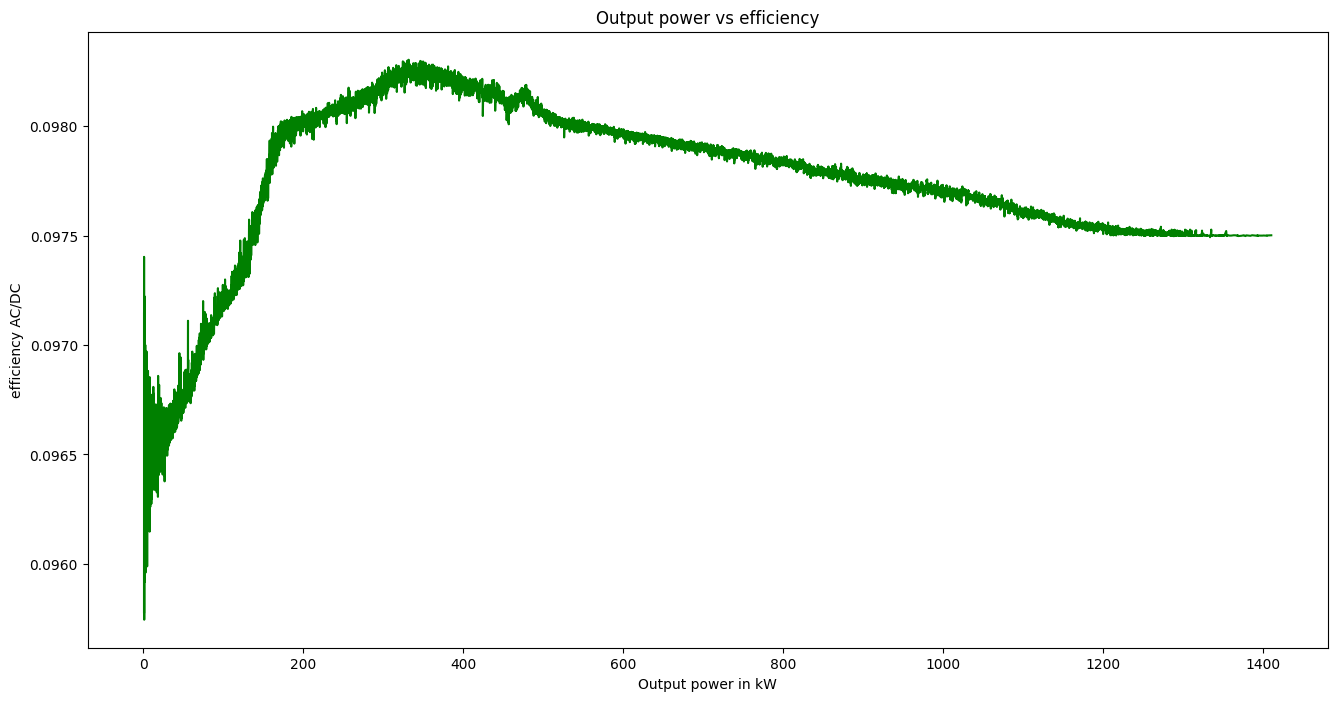

In [35]:
plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()
#print(DC_list)
#DC_list.sort
#res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='green')
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency');

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:#e90045">Solar Power Prediction</h1>

In [36]:
df2 = df_solar.copy()
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df2['AC_POWER']

In [37]:
X.head()

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER
0,0.0,6.260e+06,27.005,25.061,0.0,0.0
1,0.0,6.184e+06,27.005,25.061,0.0,0.0
2,0.0,6.988e+06,27.005,25.061,0.0,0.0
3,0.0,7.603e+06,27.005,25.061,0.0,0.0
4,0.0,7.159e+06,27.005,25.061,0.0,0.0


In [38]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

<span style="background-color:yellow;
             color:Black;
             font-size:25px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">1. LinearRegression
</span>

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')

LR Model score = 99.9995%


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  100.0 %


<span style="background-color:yellow;
             color:Black;
             font-size:25px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">2. RandomForestRegressor
</span>

In [42]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

R2 Score :  100.0 %


<span style="background-color:yellow;
             color:Black;
             font-size:25px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">3. DecisionTreeRegressor
</span>

In [43]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = rfr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_dtr,"%")

R2 Score :  100.0 %


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">12. Result Prediction
</span>

In [44]:
prediction = rfr.predict(X_test)
print(prediction)

[  0.           0.           0.         ... 193.4862143  799.20185714
   0.        ]


In [45]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.head()

,Actual,Predicted
8215,0.0,0.0
29271,0.0,0.0
41217,0.0,0.0
66321,0.0,0.0
434,0.0,0.0


In [46]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

,Actual,Predicted,Error
8215,0.0,0.0,0.0
29271,0.0,0.0,0.0
41217,0.0,0.0,0.0
66321,0.0,0.0,0.0
434,0.0,0.0,0.0


In [47]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted,Error
46962,642.300000,642.262054,0.037946
62673,0.000000,0.000000,0.000000
36891,0.000000,0.000000,0.000000
33855,662.950000,662.917839,0.032161
50268,0.000000,0.000000,0.000000
61694,583.514286,583.435179,0.079107
45370,0.000000,0.000000,0.000000
34084,1298.314286,1298.404339,-0.090053
7471,355.462500,355.219232,0.243268
15047,0.000000,0.000000,0.000000


In [48]:
import pandas as pd

# Load the economic data
economic_data = pd.read_excel(r'\Users\dell\OneDrive\Desktop\PVSCM11.xlsx')

# Assuming df_solar is your project's dataframe, which includes annual energy output
# For demonstration, let's create a sample df_solar
df_solar = pd.DataFrame({
    'Location': ['Location1', 'Location2'],
    'PanelSize_kWdc': [5, 10],
    'AnnualEnergyOutput_kWh': [7000, 14000]
})

# Sample electricity rate (CAD per kWh)
electricity_rate_CAD_per_kWh = 0.1

# Calculate installation cost by summing the 'Price Element per kWdc-yr' for all components
# Note: This simplifies the calculation; adjust based on actual data and needs
installation_cost_per_kWdc = economic_data['Price Element per kWdc-yr'].sum()

# Calculate total installation cost based on panel size
df_solar['InstallationCost_CAD'] = df_solar['PanelSize_kWdc'] * installation_cost_per_kWdc

# Calculate annual return based on annual energy output and electricity rate
df_solar['AnnualReturn_CAD'] = df_solar['AnnualEnergyOutput_kWh'] * electricity_rate_CAD_per_kWh

# Assuming a fixed cost for maintenance per year (placeholder value)
annual_maintenance_cost_CAD = 100

# Adjust Annual Return considering maintenance costs
df_solar['AdjustedAnnualReturn_CAD'] = df_solar['AnnualReturn_CAD'] - annual_maintenance_cost_CAD

# Calculate break-even time
df_solar['BreakEvenTime_Years'] = df_solar['InstallationCost_CAD'] / df_solar['AdjustedAnnualReturn_CAD']

# Display the resulting dataframe
df_solar


,Location,PanelSize_kWdc,AnnualEnergyOutput_kWh,InstallationCost_CAD,AnnualReturn_CAD,AdjustedAnnualReturn_CAD,BreakEvenTime_Years
0,Location1,5,7000,17777.814,700.0,600.0,29.63
1,Location2,10,14000,35555.628,1400.0,1300.0,27.35


In [49]:
from sklearn.tree import DecisionTreeRegressor

# Assuming your training and test sets are already defined: X_train, X_test, y_train, y_test
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)  # This line defines y_pred_dt


In [50]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train, X_test, y_train, y_test have been defined previously
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)  # This line defines y_pred_rf


In [51]:
# Assuming y_test is a Series, make sure its index aligns with the predictions
y_test.reset_index(drop=True, inplace=True)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': y_pred_lr,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf
})


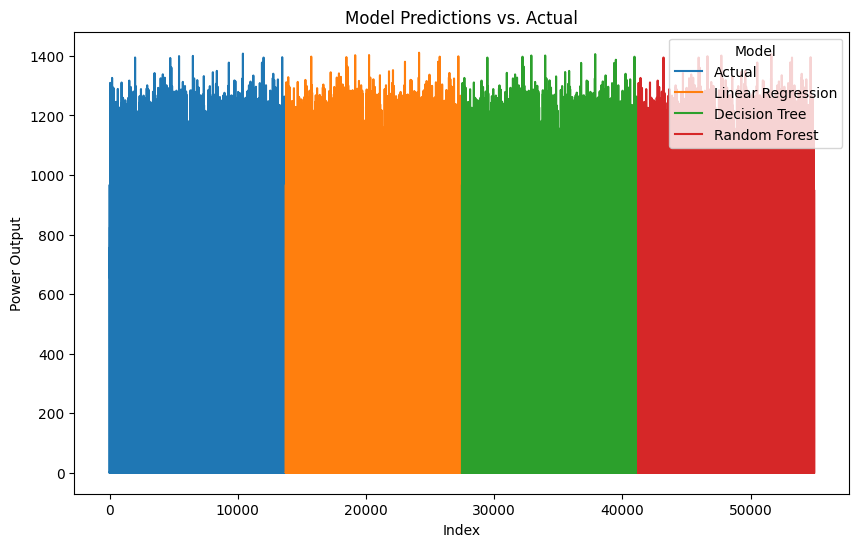

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame to make it suitable for sns.lineplot
comparison_df_melted = comparison_df.melt(value_name='Power Output', var_name='Model')

plt.figure(figsize=(10, 6))
sns.lineplot(data=comparison_df_melted, x=comparison_df_melted.index, y='Power Output', hue='Model')
plt.title('Model Predictions vs. Actual')
plt.xlabel('Index')
plt.ylabel('Power Output')
plt.legend(title='Model')
plt.show()
